# NYC Yellow Taxi: Maximizing Revenue

The NYC Yellow Taxi industry is a fast-paced and highly competitive sector. Taxi drivers and operators are always looking for ways to maximize their revenue streams. One critical aspect influencing revenue is the payment method chosen by passengers. Different payment methods may have varying impacts on the fare amount, either directly (due to fees, taxes, or surcharges) or indirectly (due to tipping habits and fare negotiation).

However, the relationship between payment methods and fare amounts remains unclear. Operators and drivers need data-driven insights to identify the payment types that offer higher revenues or impact fare pricing.


## Objective

The primary objective of this project is to conduct an A/B test to analyze the relationship between payment methods (credit card vs. cash) and the total fare amount charged in NYC Yellow Taxi rides. Using Python for hypothesis testing and descriptive statistics, the project seeks to discover whether payment methods impact fare pricing significantly. The insights will guide strategies for taxi drivers to maximize revenue, aligning their services with the observed patterns of customer payment preferences.

In [285]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as st 
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')

# Loading the Dataset and Cleaning

https://data.world/vizwiz/nyc-taxi-jan-2020

1. **VendorID**: A code indicating the TPEP provider that provided the record. 1 = Creative Mobile Technologies, LLC; 2= VeriFone Inc.
2. **tpep_pickup_datetime**: The date and time when the meter was engaged. 
3. **tpep_dropoff_datetime**: The date and time when the meter was disengaged. 
4. **Passenger_count**: The number of passengers in the vehicle. 
5. **Trip-distance**: The elapsed trip distance in miles reported by the taximeter. 
6. **PULocationID**: TLC Taxi Zone in which the taximeter was engaged. 
7. **DOLocationID**: TLC Taxi Zone in which the taximeter was disengaged. 
8. **RateCodeID**: The final rate code in effect at the end of the trip. 1=Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6= Group ride. 
9. **Store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka "store and forward", because the vehicle did not have a connection to the server. Y= store and forward trip, N=not a store and forward trip
10. **Payment_type**: A numeric code signifying how the passenger paid for the trip. 1=credit card, 2=cash, 3=No charge, 4=Dispute, 5=Unknown, 6=Voided trip.
11. **Fare_amount**: The time-and-distance fare calculated by the meter. 
12. **Extra**: Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges. 
13. **MTA_tax**: $0.50 MTA tax that is automatically triggered based on the metered rate in use. 
14. **Improvement_surchage**: $0.30 improvement surchage assessed trips at the flag drop. The improvement surcharge began being levied in 2015. 
15. **Tip_amount**: This field is automatically populated for credit card tips. Cash tips are not included. 
16. **Tolls_amount**: Total amount of all tolls paid in trip. 
17. **Total_amount**: The total amount charges to passengers. Does not include cash tips.
18. **Congestion_Surchage**: Total amount collected in trip for NYS congestion surcharge. 

In [217]:
data_path = r"C:\Users\Wen\OneDrive\Documents\GitHub\Portfolio_Project\Data Analysis\Statistics Project\NYC Yellow Taxi\vizwiz-nyc-taxi-jan-2020\yellow_tripdata_2020-01.csv"
df = pd.read_csv(data_path)
df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [218]:
df.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [219]:
df.shape

(6405008, 18)

In [220]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [221]:
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])

In [222]:
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"])
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39


In [223]:
df["seconds"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds()/60
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,seconds
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,0 days 00:04:48,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,0 days 00:07:25,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,0 days 00:06:11,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,0 days 00:04:51,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,0 days 00:02:18,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,0 days 00:31:00,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,0 days 01:16:00,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,0 days 00:27:50,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,0 days 00:22:39,22.650000


In [224]:
df = df[["passenger_count","trip_distance", "payment_type", "fare_amount", "duration"]]
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1.0,1.20,1.0,6.00,0 days 00:04:48
1,1.0,1.20,1.0,7.00,0 days 00:07:25
2,1.0,0.60,1.0,6.00,0 days 00:06:11
3,1.0,0.80,1.0,5.50,0 days 00:04:51
4,1.0,0.00,2.0,3.50,0 days 00:02:18
...,...,...,...,...,...
6405003,NaN,3.24,NaN,17.59,0 days 00:31:00
6405004,NaN,22.13,NaN,46.67,0 days 01:16:00
6405005,NaN,10.51,NaN,48.85,0 days 00:27:50
6405006,NaN,5.49,NaN,27.17,0 days 00:22:39


In [225]:
df.isnull().sum()

passenger_count    65441
trip_distance          0
payment_type       65441
fare_amount            0
duration               0
dtype: int64

In [226]:
df.dropna(subset=["passenger_count", "payment_type"], inplace=True)
df.isnull().sum()

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [227]:
df.dtypes

passenger_count            float64
trip_distance              float64
payment_type               float64
fare_amount                float64
duration           timedelta64[ns]
dtype: object

In [228]:
df["passenger_count"] = df["passenger_count"].astype("int64")
df["payment_type"] = df["payment_type"].astype("int64")
df.dtypes

passenger_count              int64
trip_distance              float64
payment_type                 int64
fare_amount                float64
duration           timedelta64[ns]
dtype: object

In [229]:
df[df.duplicated()].sum()

passenger_count                4022684
trip_distance               4700899.61
payment_type                   4018601
fare_amount                26853721.53
duration           20185 days 03:16:27
dtype: object

In [230]:
df.drop_duplicates(inplace=True)


In [231]:
print(df.duplicated().sum())


0


The majority of rides involve 1 to 2 passengers, with a single passenger being the most common scenario. This is a typical for taxi services where solo trips are frequent. 

The counts for 5 or more passengers are notably lower but still significant. This might indicate usage of larger vehicles or group travel. 

Extremly low counts for 7 to 9 passengers could indicate data errors or very rare cases where large vehicles were used. 

In [232]:
df["passenger_count"].value_counts()

passenger_count
1    1750518
2     572547
3     199602
5     189305
6     118124
4     108422
0      69280
7         28
9         18
8         17
Name: count, dtype: int64

The majority of payments are made with type "1" (credit card), followed by type "2" (cash). This aligns with a trend towards digital payments, especially in cities where credit card usage is high. 

Types "3" (no charge), "4" (dispute), "5" (unkown) represent a small fraction of the total transactions, which is typical but these entries need special attention to avoid skewing the data analysis.

Type "5" appears only once, which might be a data entry error or an outlier. 

In [233]:
df["payment_type"].value_counts()

payment_type
1    2040133
2     925137
3      26233
4      16357
5          1
Name: count, dtype: int64

In [234]:
df = df[df["payment_type"]< 3]
df = df[(df["passenger_count"]>0)& (df["passenger_count"]<6)]

In [235]:
df.shape

(2780283, 5)

We will focus solely on payment types "Card" and "Cash", denoted by 1 and 2 in the dataset. To ensure our analysis centers on these payment methods, we'll filter the data accordingly, excluding all other types. 

In [236]:
df["payment_type"].replace([1,2], ["Card", "Cash"], inplace=True)
df

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,0 days 00:04:48
1,1,1.20,Card,7.0,0 days 00:07:25
2,1,0.60,Card,6.0,0 days 00:06:11
3,1,0.80,Card,5.5,0 days 00:04:51
4,1,0.00,Cash,3.5,0 days 00:02:18
...,...,...,...,...,...
6339555,3,2.09,Card,10.0,0 days 00:14:48
6339561,1,4.11,Card,17.5,0 days 00:21:30
6339563,1,2.13,Card,13.0,0 days 00:19:00
6339564,1,2.55,Card,12.5,0 days 00:16:17


In [237]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2780283
mean,1.733386e+00,4.536729e+00,1.780567e+01,0 days 00:24:09.286787711
std,1.176652e+00,4.895890e+00,1.506997e+01,0 days 01:32:36.018871025
min,1.000000e+00,-2.218000e+01,-5.000000e+02,-2 days +01:49:38
25%,1.000000e+00,1.500000e+00,9.000000e+00,0 days 00:09:53
50%,1.000000e+00,2.730000e+00,1.300000e+01,0 days 00:15:44
75%,2.000000e+00,5.470000e+00,2.100000e+01,0 days 00:23:22
max,5.000000e+00,2.628800e+02,4.265000e+03,5 days 22:05:07


This is used for outlier detection and removal based on the Interquartile Range (IQR) method. This is a common approach to clean data by eliminating extreme values that can skew the analysis. 

Purpose of this approach:

- Reduce Skewness and Improve Accuracy: Outliers can significantly skew the results of statistical analyses and can lead to misleading interpretations. Removing them helps in achieving more accurate and robust statistical outcomes.
- Normalization of Data: It helps in normalizing the data distribution, making it more symmetrical, which is especially beneficial for many statistical tests and regression models that assume normality.
- Improving Model Performance: For predictive models, removing outliers can improve the model's performance by making it not overly sensitive to extreme values.

In [238]:
for col in ["fare_amount", "trip_distance", "duration"]:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1 
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    before_filter = df['payment_type'].value_counts()
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after_filter = df['payment_type'].value_counts()

    print(f"Before filtering {col}:")
    print(before_filter)
    print(f"After filtering {col}:")
    print(after_filter)
  

Before filtering fare_amount:
payment_type
Card    1907801
Cash     872482
Name: count, dtype: int64
After filtering fare_amount:
payment_type
Card    1711918
Cash     813699
Name: count, dtype: int64
Before filtering trip_distance:
payment_type
Card    1711918
Cash     813699
Name: count, dtype: int64
After filtering trip_distance:
payment_type
Card    1595861
Cash     768334
Name: count, dtype: int64
Before filtering duration:
payment_type
Card    1595861
Cash     768334
Name: count, dtype: int64
After filtering duration:
payment_type
Card    1559345
Cash     755577
Name: count, dtype: int64


Reduction in Data Points:

- After filtering fare_amount, the number of entries decreased from  2,780,283 to 2,525,617, which is a reduction of approximately 9.15%.
- Filtering trip_distance further reduced the dataset from 2,525,617 to  2,364,195 entries, around 6.39% further reduction.
- The final filtering on duration reduced the dataset slightly more to 2,314,922, which is about 2.08% of the previous subset.

The filtering reduced the dataset by approximately 16.72% from the original size. 
The proportion of Card to Card payments saw a slight shift favoring Cash payments, which might be minor but is worth noting, especially if the hypothesis testing is sensitive to the distribution of payment types. 

# Data Visualization

We're interested on exploring the relationship between payment type and passenger behavior concerning trip distance and fare amount. Are there variations in the distribution of payment types concerning different fare amount or trip distances?

To investigate this, we'll plot histograms to visualize the distribution of passenger counts paying with either card or cash. This will also provide stakeholders with insight into fare amount ranges associated with different payment methods. 

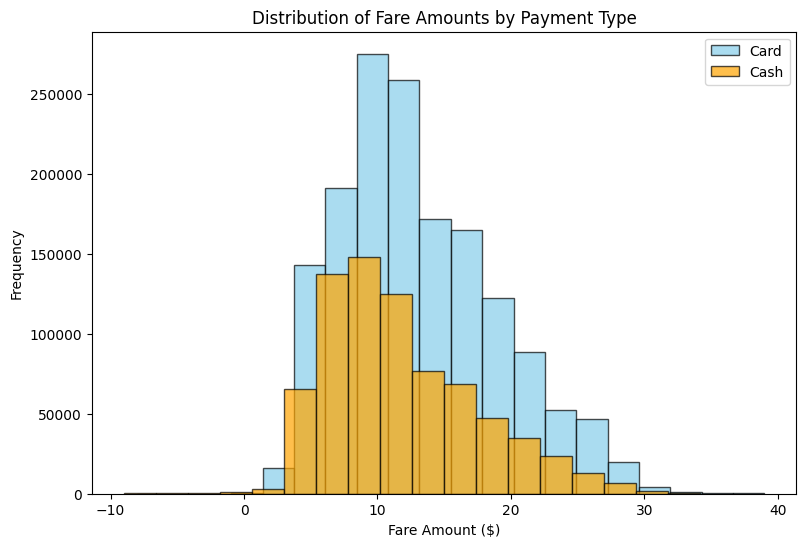

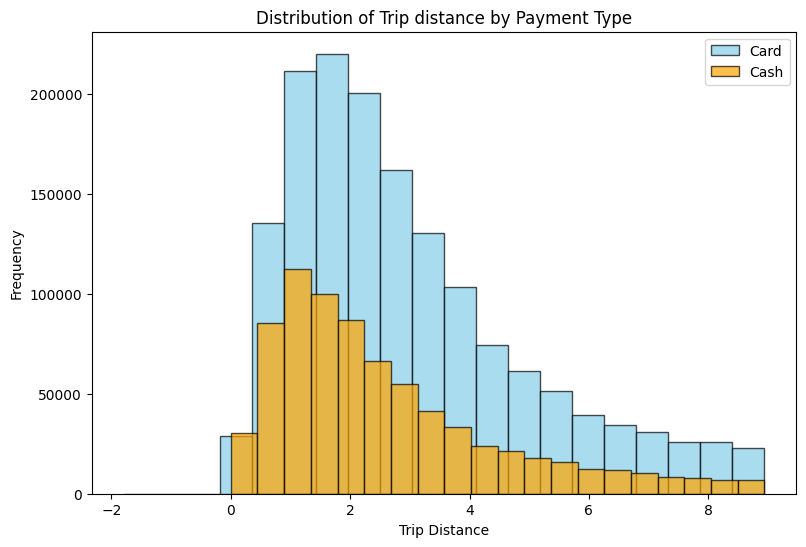

In [277]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.hist(df[df["payment_type"]=="Card"]["fare_amount"], histtype="barstacked", bins = 20, edgecolor = "k", color='skyblue', label='Card', alpha = 0.7)
plt.hist(df[df["payment_type"]=="Cash"]["fare_amount"], histtype="barstacked", bins = 20, edgecolor = "k", color='orange', label='Cash', alpha = 0.7)
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amounts by Payment Type')
plt.legend()
plt.show()

plt.figure(figsize=(20,6))
plt.subplot(1,2,2)
plt.title("Distribution of Trip Distance")
plt.hist(df[df["payment_type"] == "Card"]["trip_distance"], histtype="barstacked", bins=20, edgecolor="k", color = "skyblue", label = "Card", alpha = 0.7)
plt.hist(df[df["payment_type"] == "Cash"]["trip_distance"], histtype="barstacked", bins=20, edgecolor="k", color = "orange", label = "Cash", alpha = 0.7)
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Trip distance by Payment Type")
plt.legend()
plt.show()


**Shape of Distribution** : Both distributions appear right skewed, meaning that most of the data is concentrated on the left side of the graph with a long tail to the right. This is typical for fare data, where many trips cost relatively little, but a few trips (e.g., longer distances, traffic delays) cost significantly more. 

**The distribution of fare amounts by payment type**: the distribution for card payments is slightly more extended into the higher fare amounts, suggesting that rides paid with Card might occasionally involve higher costs than those paid with Cash. It could indicate that passengers paying by Card are either less sensitive to price, take longer trips, or perhaps the payment method is pre-selected in contexts like pre-booked or business-related travels which might have longer routes. 

**The distribution of trip distance by payment type**: The distribution for card payments shows slightly more frequently at higher distances than Cash payments, aligning with the fare amount distribution where Card payments also extend into higher fare amounts. This could suggest that Card users undertake longer trips on average compared to Cash users. 

In [271]:
print(df.groupby('payment_type')['fare_amount'].describe())

                  count       mean       std  min  25%   50%   75%   max
payment_type                                                            
Card          1559345.0  13.152191  5.897810 -8.0  8.5  12.0  17.0  39.0
Cash           755577.0  11.698013  5.684603 -9.0  7.5  10.5  15.0  39.0


Count: 
- Card payments: 1559345.0 transactions
- Cash payments:  755577.0 transactions
This indicates that there are approximately twice as many transactions made with a card compared to cash. 

Mean Fare Amount: 
- Card: The average fare amount for rides paid with Card is $13.15.
- Cash: The average fare amount for rides paid with Cash is $11.70.
The higher mean fare for card payments aligns with the histogram observations where Card payments tended to show a slightly higher fare range.

Standard Deviation:
- Card: The standard deviation for Card payments is $5.90.
- Cash: The standard deviation for Cash payments is $5.68.
These values indicate a similar level of variability in fare amounts for both payment types, though slightly higher for Card payments.

Minimum Fare Amount:
- Card: Minimum recorded fare is -$8.00.
- Cash: Minimum recorded fare is -$9.00.
Negative fares are unusual and likely indicate refunds or data entry errors.

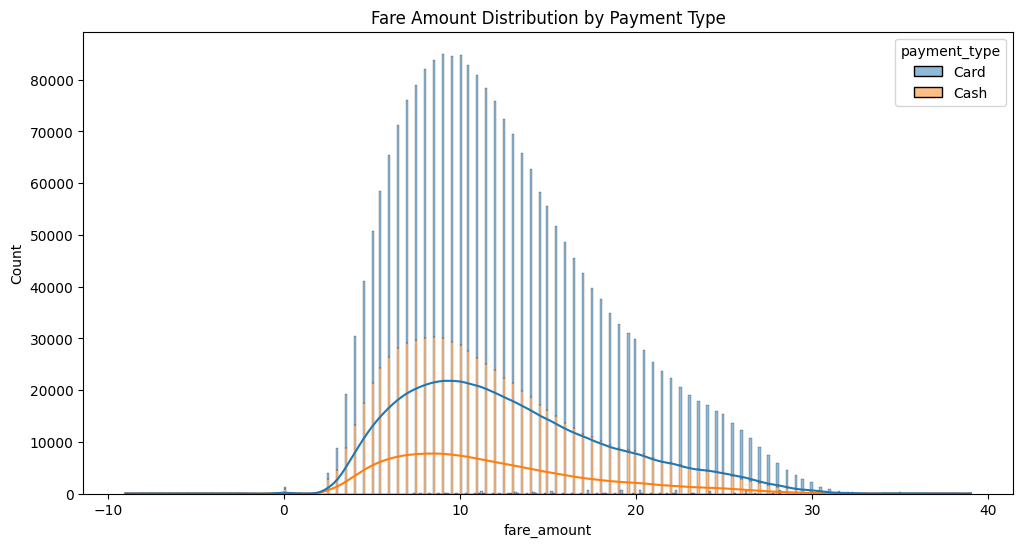

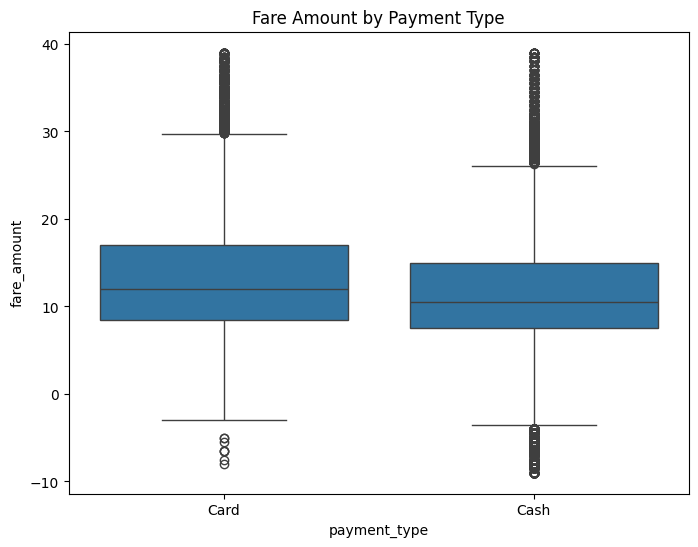

In [272]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='fare_amount', hue='payment_type', multiple='stack', kde=True)
plt.title('Fare Amount Distribution by Payment Type')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_type', y='fare_amount', data=df)
plt.title('Fare Amount by Payment Type')
plt.show()


Histogram with Kernel Density Estimates (KDE)
- Distribtuion Shape: Both distributions are skewed to the right, indicating that most of the fare amounts are clustered towards the lower end with fewer occurrences of high fare amounts. 
- Peak Comparison: The peak fare amount for Card payments is slighly higher than for Cash payments, which suggests that the average fare amount for Card is higher. 
- Width of Distribution: The distribution for Card payments is wider than for Cash, indicating a greater range of fare amounts.This could suggest more variability in the fares paid by Card, possibly due to the use of cards for longer or more expensive trips.

Box plots
- Median: Indicated by the line inside each box, the median fare amount is higher for Card than for Cash, aligning with your descriptive statistics (Card: $12.00, Cash: $10.50).
- Interquartile Range (IQR): The boxes represent the middle 50% of the data (from the 25th percentile to the 75th percentile). The IQR is wider for Card payments, which is consistent with the greater standard deviation and suggests more variability in fare amounts for Card payments.
- Whiskers: These extend to show the range of data excluding outliers. The range is similar for both payment types, but note the difference in outliers.
- Outliers: Shown as individual points, there are more extreme outliers for Card payments than for Cash. This may reflect occasional very high fares paid by card, possibly due to longer trips, trips involving tolls, or other factors.


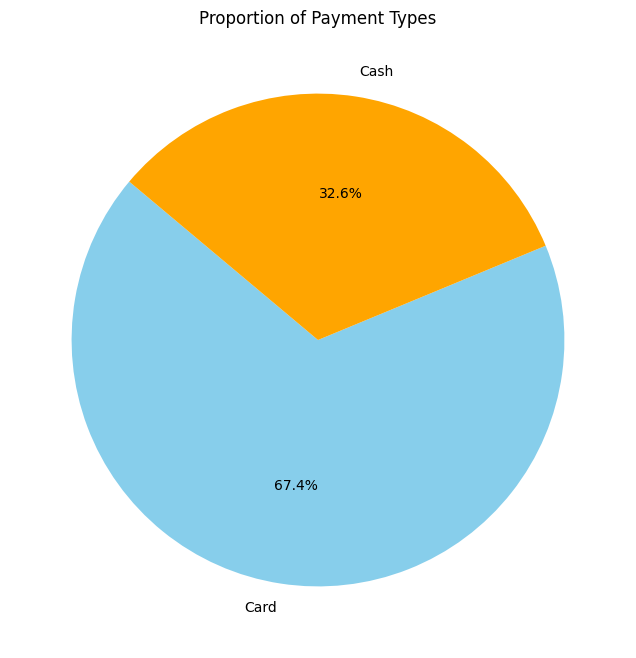

In [278]:
payment_counts = df["payment_type"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%", startangle=140, colors=["skyblue", "orange"])
plt.title("Proportion of Payment Types")
plt.show()

Subsequently, we aim to conduct an analysis of the payment types in relation to the passenger count. Our objective is to investigate if there any changes in preference contingent upon the number of passengers traveling in the cab. 
 


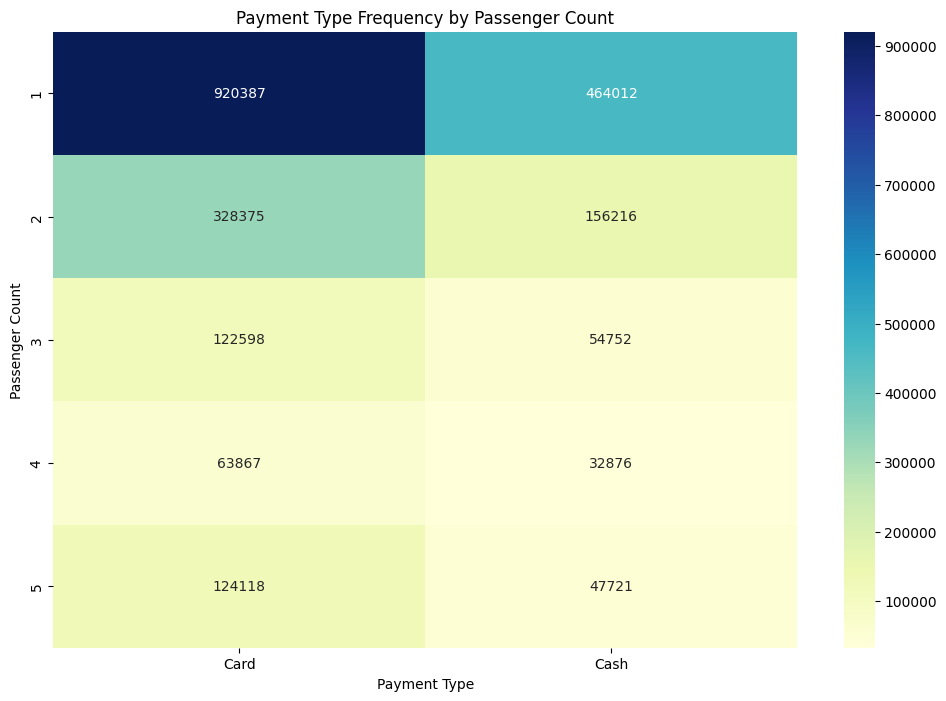

In [282]:
payment_passenger_ct = pd.crosstab(df['passenger_count'], df['payment_type'])

plt.figure(figsize=(12, 8))
sns.heatmap(payment_passenger_ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Payment Type Frequency by Passenger Count')
plt.xlabel('Payment Type')
plt.ylabel('Passenger Count')
plt.show()


For one passenger, card payments are almost twice as common as cash payments. 
As the number of passengers increases, the frequency of both payment types decreases, but card payments consistently remain more common than cash. 
The largest discrepancy in payment type usage appears in rides with one passenger, which significantly favors card payments.

# Hypothesis Testing

In order to select the most suitable test for our scenario, our initial step involves evaluating whether the distribution of fare amounts adheres to a normal distribution. While the histogram depicted above suggests otherwise, we will further confirm this by generating a histogram and QQ plot. 

Quantile-quantile (QQ) plots can be used to assess whether the fare amount distributiona for each payment type are approximately normally distributed. If the data points closely align with the diagonal line in the plot, it suggests that the data follows a normal distribution. 


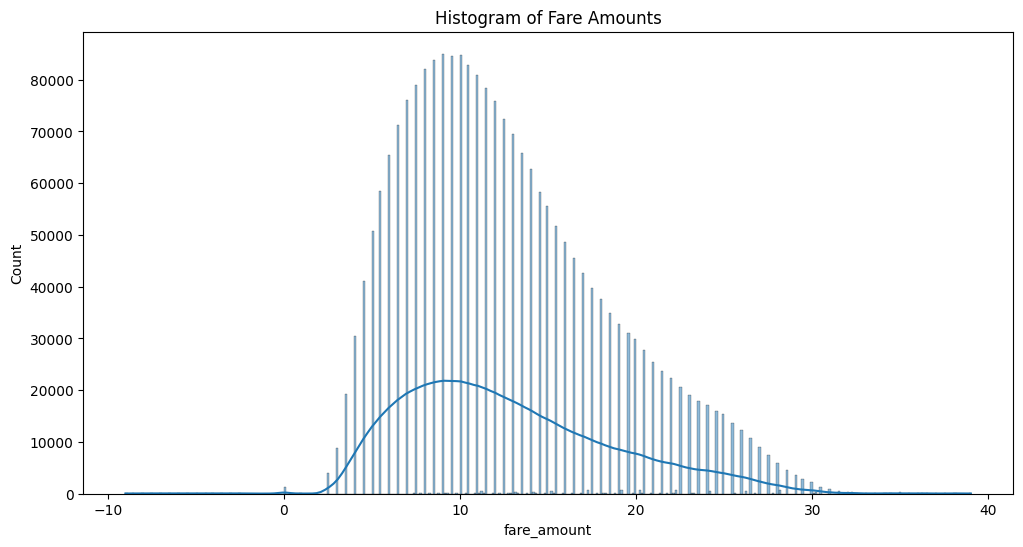

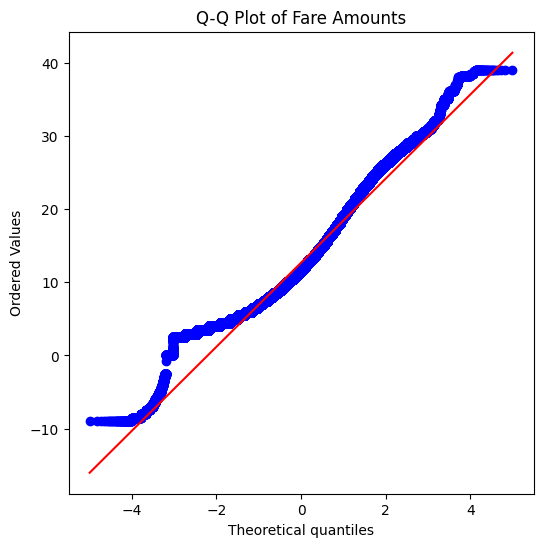

In [297]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['fare_amount'], kde=True)
plt.title('Histogram of Fare Amounts')
plt.show()

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(df['fare_amount'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fare Amounts')
plt.show()


The data values from the NYC Yellow Taxi Trip Records clearly do not follow the red 45-degree line in the Q-Q plot, indicating a deviation from a normal distribution. Given this non-normality, as further evidenced by the right-skewed histogram, it is inappropriate to use a t-test directly for hypothesis testing without transforming the data to approximate normality. This is because the t-test fundamentally relies on the assumption that the underlying data is normally distributed, a condition not met in our case. Considering the skewness and evident departure from normal distribution, non-parametric tests such as the Mann-Whitney U test (for two independent samples) or the Kruskal-Wallis test (for more than two independent samples) are recommended. These tests do not require the data to be normally distributed and are robust to outliers, making them better suited for analyzing large datasets like those of the NYC Yellow Taxi, where the population standard deviation is unknown and the sample size is large. This approach not only accommodates the inherent uncertainty in estimating population parameters from sample data but also ensures the reliability of the inference made about the population.

Null Hypothesis (H0): The mean fare amount for customers who pay with credit cards is equal to the mean fare amount for customers who pay with cash.

Alternative Hypothesis (H1): The mean fare amount for customers who pay with credit cards is different from the mean fare amount for customers who pay with cash.

In [298]:

card_fares = df[df['payment_type'] == 'Card']['fare_amount']
cash_fares = df[df['payment_type'] == 'Cash']['fare_amount']

t_stat, p_value = stats.ttest_ind(card_fares, cash_fares, equal_var=True)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


if p_value < 0.05:
    print("\nReject the null hypothesis")
if p_value > 0.05:
    print("\nAccept the null hypothesis")


T-statistic: 177.97545194224256
P-value: 0.0

Reject the null hypothesis


Since the p-value is significantly smaller than significance level of 5%, we will reject the null hypothesis. 

To statistically verify whether the observed differences in payment type preference across passenger counts are significant, you could perform a Chi-square test of independence. This test will help determine if the variations in payment type distribution are statistically significant or merely due to random variation.

The Chi-square statistic is a measure of how much the observed frequencies (the number of rides with different passenger counts for each payment type) deviate from the expected frequencies if there were no association between passenger count and paymen type. A higher Chi-square statistic indicates a greater deviation from the expected frequencies under the null hypothesis (no assoiciation).

Null Hypothesis (H0): Passenger count does not affect the choice of payment method (the proportions of payment types are the same across all passenger counts).

Alternative Hypothesis (H1): Passenger count affects the choice of payment method (the proportions of payment types vary among different passenger counts).

In [299]:
crosstab = pd.crosstab(df['passenger_count'], df['payment_type'])

chi2, p_value, dof, expected = chi2_contingency(crosstab)

print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

if p_value < 0.05:
    print("\nReject the null hypothesis")
if p_value > 0.05:
    print("\nAccept the null hypothesis")

Chi-square Statistic: 2704.88047913182
P-value: 0.0

Reject the null hypothesis


This suggests that there is a statistically significant association between the passengers count and the type of payment used. 

# Conclusion 

In conclusion, the key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers. This might be due to several factors, including the types of trips typically charged to credit cards (e.g., longer distances, business trips, airport runs) versus cash (possibly shorter, routine trips). For taxi companies or drivers, understanding these patterns can help in targeting specific customer segments or adjusting services to maximize revenue. For example, promoting card payments could potentially lead to higher revenue per trip.